# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [6]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [11]:
df.groupby('gender').mean()

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [12]:
df.groupby('gender').count()

,temperature,heart_rate
gender,,
F,65,65
M,65,65


In [13]:
df.groupby('gender').std()

,temperature,heart_rate
gender,,
F,0.743488,8.105227
M,0.698756,5.875184


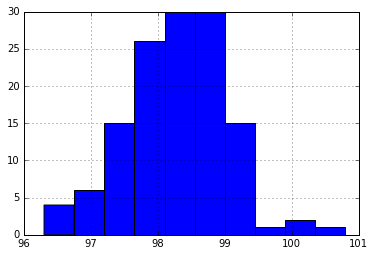

In [14]:
%matplotlib inline

df.temperature.hist()

In [15]:
#Q1: is distribution normal? Unclear, the distribution is skewed on sight, but we need to run a test
from scipy import stats

stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

A1: p-value of 25% shows no statistically significant difference from a normal distribution. So YES, it is Normal

Q2: Is the sample size large? Are the observations independent?


A2: There are only 130 observations, while evenly split between men and women, this is a very small sample set for any population level stats. Given the nature of collection cited (https://ww2.amstat.org/publications/jse/datasets/normtemp.txt) we can say that these are independent observations. 

# Is the true population mean really 98.6 degrees F?

Q3: Would you use a one-sample or two-sample test? Why?
  One sample, because we are given a sample group mean, to compare to an accepted group mean. 

In this situation, is it appropriate to use the  tt  or  zz  statistic?
  We will use a t-stastic since while the mean is estimated at 98.6, the Population Std is unknown. 

We know from above that the mean is 98.25

Compare that sample mean to the population mean of 98.6.
H0: M = 98.6
H1: M < 98.6

In [56]:
one_sample = stats.ttest_1samp(df['temperature'], popmean=98.6)
print('t-statistic: %.4f | p-value: %.4f.' % one_sample)

t-statistic: -5.4548 | p-value: 0.0000.


The p-value is very low. So we reject the Null. Therefore, it is highly UNLIKELY that if the reported 98.6 mean human body temp was true, that we would have ever produced this data set. 

Now try using the other test. How is the result be different? Why?mean = df['temperature'].mean()
Compare that sample mean to the population mean of 98.6 
H0: M = 98.6
H1: M != 98.6

In [57]:
import numpy as np

x = df['temperature']

se = x.std() / len(x) ** 0.5
z = (np.mean(x) - 98.6) / se
print('z-statistic: {:.6f}'.format(z))

z-statistic: -5.454823


In [58]:
#two sided test, who cares are about direction? 
p = stats.norm.sf(abs(z))*2
print('p-statistic: {:.6f}'.format(p))

p-statistic: 0.000000


As with the t-test, the p-value is very low. So we reject the Null. Therefore, it is highly UNLIKELY that if the reported 98.6 mean human body temp was true, that we would have ever produced this data set. 

# Draw a small sample of size 10 from the data and repeat both tests.

In [37]:
ss = np.random.choice(x, size=10)

In [38]:
ss

array([ 98.2,  99.1,  98.4,  99.2,  98.8,  98.4,  97.1,  97.4,  96.4,  98. ])

In [60]:
ss_sample = stats.ttest_1samp(ss, popmean=98.6)
print('t-statistic: %.4f | p-value: %.4f.' % ss_sample)

t-statistic: -1.7580 | p-value: 0.1126.


Now the p-value is higher. At 0.05 we would accept the Null with this smaller sample. 

In [61]:
SE = ss.std() / len(ss) ** 0.5
z = (np.mean(ss) - 98.6) / SE
print('z-statistic: {:.6f}'.format(z))

p = stats.norm.sf(abs(z))*2
print('p-statistic: {:.6f}'.format(p))

z-statistic: -1.853123
p-statistic: 0.063865


Again the p-value is higher. At 0.05 we would accept the Null with this smaller sample. 
A two sided z Test is out performing even at a lower number of observations 

# At what temperature should we consider someone's temperature to be "abnormal"?

2 Std above or below the mean would be stastically outside of 'normal'. 

In [44]:
print(np.percentile(x,[5,95]))

[ 97.045  99.3  ]


In [45]:
se = x.std() / len(x) ** 0.5
me = 1.96 * se
ci = (np.mean(x) - me, np.mean(x) + me)
ci

(98.12319411222852, 98.37526742623304)

In [46]:
high = str(np.mean(x) + np.std(x))
low = str(np.mean(x) - np.std(x))
print('Normal Human Temps are between '+high+' and '+low+'.')

Normal Human Temps are between 98.9795885481 and 97.5188729903.


# Is there a significant difference between males and females in normal temperature?

Employ two-sample hypothesis test to determine if a statistically-significant difference in normal temperatures occurs between males and females:

H0: mean_males - mean_females == 0

H1: mean_males - mean_females != 0

Since the direction of the difference is unimportant, use a two-sided hypothesis test.

In [53]:
m = df[df.gender == 'M']['temperature']
f = df[df.gender == 'F']['temperature']

print('Male Mean: '+str(np.mean(m))+' | Female Mean: '+str(np.mean(f)))

Male Mean: 98.1046153846 | Female Mean: 98.3938461538


In [54]:
two_sample = stats.ttest_ind(m, f)
print('t-statistic: %.2f | p-value: %.5f.' % two_sample)

t-statistic: -2.29 | p-value: 0.02393.


The p-value is lower then 0.05 we would REJECT the Null, that the two means are equal. 

Therefore, we can conclude three thing from this project 
1 - The common knowledge that the average humand body temp being 98.6 is REJECTED
2 - Depending on how tightly we draw our CI 98.6 could be considered Abnormal
3 - Gender appears to play a role in the Average Temp of the Human Body